## Case Study on Unsupervised Learning

### Import necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Import Dataset

#### These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines

In [2]:
df = pd.read_csv(r"F:\DSA\Wine_clust .csv",header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050
3,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185
4,14.37,1.95,2.5,16.8,113,3.85,3.49,0.24,2.18,7.8,0.86,3.45,1480


In [3]:
df.drop(0,axis =0,inplace = True)

In [4]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12
1,14.23,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,13.2,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.4,1050
3,13.16,2.36,2.67,18.6,101,2.8,3.24,0.3,2.81,5.68,1.03,3.17,1185


In [5]:
df.shape

(178, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 1 to 178
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       178 non-null    object
 1   1       178 non-null    object
 2   2       178 non-null    object
 3   3       178 non-null    object
 4   4       178 non-null    object
 5   5       178 non-null    object
 6   6       178 non-null    object
 7   7       178 non-null    object
 8   8       178 non-null    object
 9   9       178 non-null    object
 10  10      178 non-null    object
 11  11      178 non-null    object
 12  12      178 non-null    object
dtypes: object(13)
memory usage: 19.5+ KB


### Performing Pre - Processing 

#### In this dataset ,we have no null values and all columns contains object type

#### Scaling the Data : StandardScaler

In [7]:
scaler =StandardScaler()
 
features =scaler.fit(df)
features =features.transform(df)
 
# Convert to pandas Dataframe
scaled_df =pd.DataFrame(features,columns=df.columns)
# Print the scaled data
scaled_df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242


## K - Means

#### K-Means requires unlabeled data in order to run. So, taking data without labels to perform K-means clustering.

In [9]:
X = scaled_df.values

C:\Users\91949\anaconda3new\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


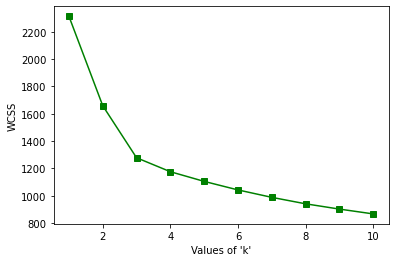

In [10]:
### The elbow Method is used to determine the number of clusters

wcss = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss[i] = kmeans.inertia_
     
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

#### From the above graph we can say that, number of cluster for the given datasets is 3.

### Implementing K - Means

In [11]:
### Let’s perform the K-Means clustering for n_clusters=3.

kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [12]:
### For each cluster, there are values of cluster centers according to the number of columns present in the data.

kmeans.cluster_centers_

array([[ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529]])

In [13]:
### labels_ Index of the cluster each sample belongs to

labels =kmeans.labels_

### Dimensionality Reduction Technique PCA

### Note:
 #### Principal Component Analysis is a technique that transforms high-dimensions data into lower-dimension while retaining as much information as possible.

#### It is used to interpret and visualize data. The number of variables decreases, which simplifies further analysis. We can then view the PCA components_, i.e. the principal axes in the feature space, which represent the directions of maximum variance in the dataset. These components are sorted by explained_variance_.

#### Minimize the dataset from 15 features to 2 features using principal component analysis (PCA).

In [14]:
pca=PCA(n_components=2)
 
reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])
 
#Reduced Features
reduced_X.head()

,PCA1,PCA2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [15]:
### Reducing the cluster centers using PCA.

centers=pca.transform(kmeans.cluster_centers_)
 
# reduced centers
centers

array([[-2.72003575, -1.12565126],
       [-0.03695661,  1.77223945],
       [ 2.2761936 , -0.93205403]])

In [16]:
pca1 = PCA(n_components =10)
pca1.fit(scaled_df)
X_pca1 = pca1.transform(scaled_df)

In [17]:
import numpy as np
np.cumsum(pca1.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717])

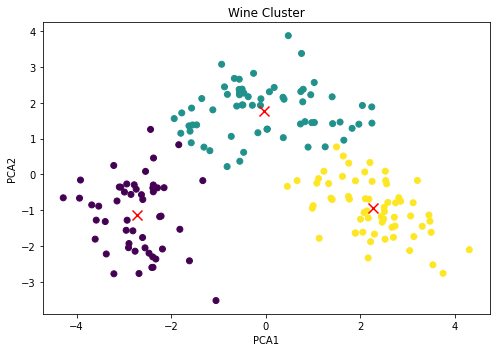

In [18]:
### Represent the cluster plot based on PCA1 and PCA2. Differentiate clusters by passing a color parameter as c=kmeans.labels_


plt.figure(figsize=(7,5))
 
# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()

In [19]:
### Effect of PCA1 & PCA2 on Clusters

### f we really want to reduce the size of the dataset, the best number of principal components is much less than the number of variables in the original dataset.

pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283]])

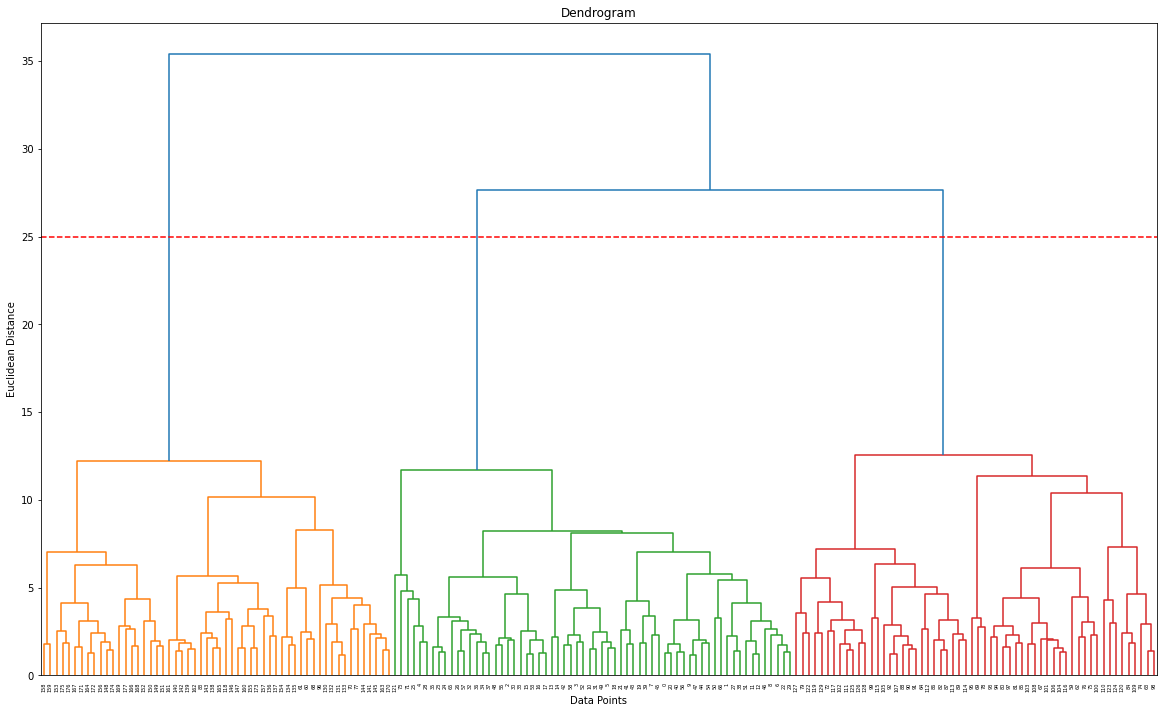

In [20]:
### Plotting Dendogram to identify clusters

import scipy.cluster.hierarchy as sch
plt.figure(figsize = (20,12))
dendrogram = sch.dendrogram(sch.linkage(scaled_df,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.axhline(y=25, color = 'r', linestyle = '--')

#### In the above dendrogram,longest distance cuts the three intersection lines,therefore cluster = 3

### Agglomerative Clustering

In [21]:
from sklearn.cluster import AgglomerativeClustering
ahc = AgglomerativeClustering(n_clusters=3 ,affinity ='euclidean',linkage = 'ward')
y_ahc = ahc.fit_predict(scaled_df)

In [22]:
y_ahc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [23]:
### Silhouette Score

from sklearn.metrics import silhouette_score
sil_ahc = silhouette_score(scaled_df,y_ahc)
y_ahc1 = ahc.fit_predict(scaled_df)
sil_ahc

0.2774439826952265

In [24]:
kmeans = KMeans(n_clusters = 3,init = 'k-means++', random_state = 42)
y_means =kmeans.fit_predict(X)

In [25]:
y_means

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [26]:
silhouette_avg = silhouette_score(X, labels)
print("The silhouette score is:", silhouette_avg)

The silhouette score is: 0.2848589191898987


In [27]:
cluster_range = range(2,10)

In [28]:
silhouette_scores = []

for num_clusters in cluster_range:
    # Fit the K-means model
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    
    # Compute the silhouette score
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    
    # Append the score to the list
    silhouette_scores.append(score)

In [29]:
silhouette_scores

[0.26831340971052126,
 0.2848589191898987,
 0.24155514990893945,
 0.23580291133345818,
 0.19776096369823137,
 0.18714623792500004,
 0.15508995649652407,
 0.1411598656234356]

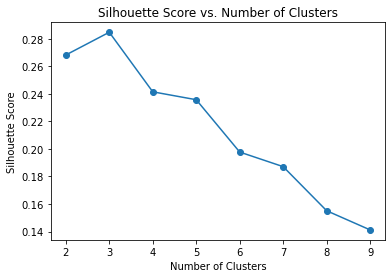

In [31]:
# Plot the silhouette scores


plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

### DB Scan Clustering

In [32]:
from sklearn.cluster import DBSCAN

# Assuming you have your data in the variable 'X'
dbscan = DBSCAN(eps=3, min_samples=5)  # Set epsilon and min_samples according to your data
dbscan_labels = dbscan.fit_predict(X)
dbscan_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [33]:
db_sil = silhouette_score(X,labels)

In [34]:
db_sil

0.1411598656234356

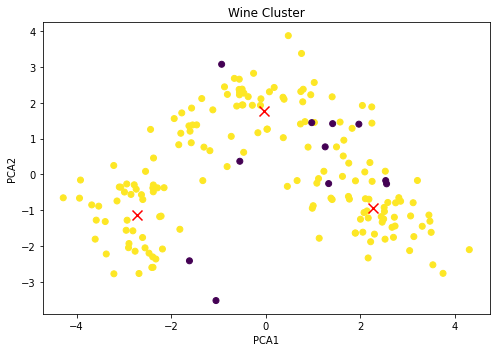

In [35]:
### Represent the cluster plot based on PCA1 and PCA2. Differentiate clusters by passing a color parameter as c=dbscan.labels_


plt.figure(figsize=(7,5))
 
# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=dbscan.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()

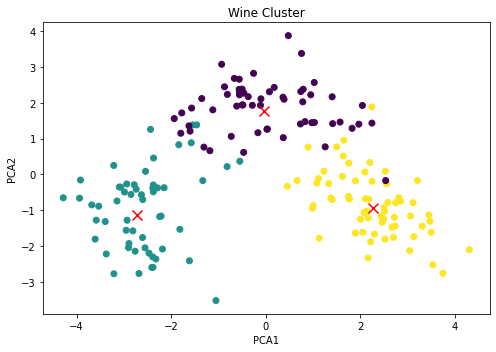

In [36]:
### Represent the cluster plot based on PCA1 and PCA2. Differentiate clusters by passing a color parameter as c=agglomerative clustering.labels_


plt.figure(figsize=(7,5))
 
# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=ahc.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Wine Cluster')
plt.tight_layout()